<a href="https://colab.research.google.com/github/NUFISMT/lab-aws-sagemaker-canvas-estoque/blob/main/sagemaker_canvas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving historico_vendas_padronizado.csv to historico_vendas_padronizado (2).csv
MAE: 0.8427473900473873
MSE: 0.9890581996794142
RMSE: 0.9945140520271266
R2 Score: -0.002702379152284662


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

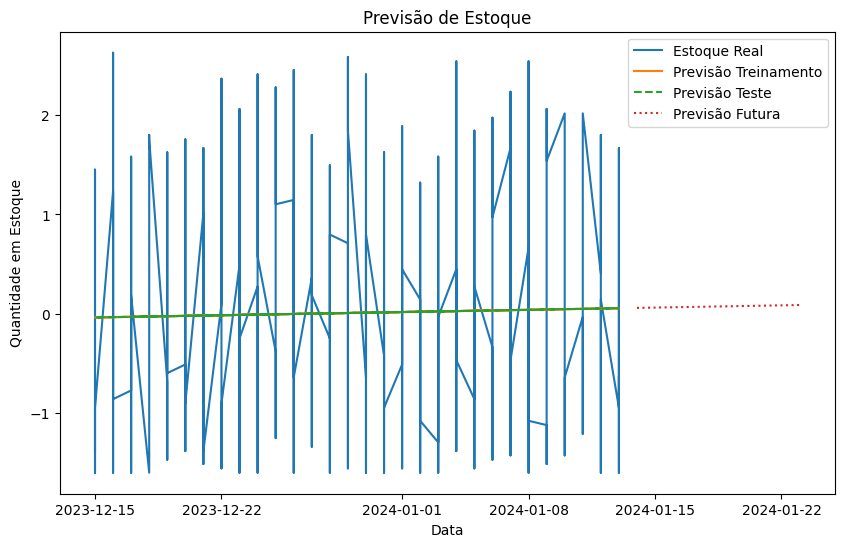

In [4]:
# Passo 1: Selecionar Dataset

from google.colab import files
import pandas as pd

# Faça o upload do dataset
uploaded = files.upload()

# Carregar o dataset selecionado
df = pd.read_csv(list(uploaded.keys())[0])

# Passo 2: Construir e Treinar o Modelo

# Converter a coluna 'DIA' para datetime, se ainda não estiver convertida
df['DIA'] = pd.to_datetime(df['DIA'])  # Sem o parâmetro format, assume o padrão ISO 8601

# Preparar os dados para o modelo
# Usaremos 'DIA_NUM' como variável de entrada e 'QUANTIDADE_ESTOQUE' como variável de saída
df['DIA_NUM'] = (df['DIA'] - df['DIA'].min()).dt.days

# Selecionar as variáveis de entrada e saída
X = df[['DIA_NUM']]
y = df['QUANTIDADE_ESTOQUE']

# Dividir os dados em conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Passo 3: Analisar

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Métricas de performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

# Ajustar o modelo se necessário e re-treinar
# Aqui, podemos adicionar mais características ou usar outro modelo mais avançado se os resultados não forem satisfatórios.

# Passo 4: Prever

# Fazer previsões usando o modelo treinado
futuro = pd.DataFrame({'DIA_NUM': range(X_train['DIA_NUM'].max() + 1, X_train['DIA_NUM'].max() + 11)})
previsoes = modelo.predict(futuro)

# Adicionar as previsões ao dataframe futuro
futuro['PREVISAO_ESTOQUE'] = previsoes

# Exportar os resultados
futuro.to_csv('previsoes_estoque.csv', index=False)
files.download('previsoes_estoque.csv')

# Documentar conclusões e insights
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['DIA'], df['QUANTIDADE_ESTOQUE'], label='Estoque Real')
plt.plot(df['DIA'].iloc[X_train.index], modelo.predict(X_train), label='Previsão Treinamento')
plt.plot(df['DIA'].iloc[X_test.index], y_pred, label='Previsão Teste', linestyle='--')
plt.plot(df['DIA'].max() + pd.to_timedelta(futuro['DIA_NUM'] - df['DIA_NUM'].max(), unit='D'), futuro['PREVISAO_ESTOQUE'], label='Previsão Futura', linestyle=':')
plt.xlabel('Data')
plt.ylabel('Quantidade em Estoque')
plt.legend()
plt.title('Previsão de Estoque')
plt.show()
